In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('../data/final_combined_jobs.csv')
# Display first few rows of the dataframe
df.head()

,url,title,company,job type,location,benefits,posted date,qualifications,job description
0,https://remote.co/job/qa-lead-26/,QA Lead,NaN,QA,Location: Remote,NaN,2024-07-26,NaN,NaN
1,https://remote.co/job/software-engineer-ruby-o...,Software Engineer (Ruby on Rails) - Remote,NaN,"Developer, Ruby on Rails",Location: Remote,NaN,2024-07-23,NaN,NaN
2,https://remote.co/job/senior-software-developm...,Senior Software Development Engineer,Equip Behavioral Health,Developer,"Location: Remote, US",NaN,2024-07-17,NaN,NaN
3,https://remote.co/job/principal-contract-admin...,Principal Contract Administrator,Parsons Corporation,Legal,"Location: Remote, US","Benefits: Career Development, Dental Insurance...",2024-07-16,NaN,NaN
4,https://remote.co/job/salesforce-software-engi...,Salesforce Software Engineer - Mid-Level,Softrams,Developer,"Location: Remote, US","Benefits: Career Development, 401k Matching/Re...",2024-07-16,NaN,NaN


In [3]:
# Display basic information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              362 non-null    object
 1   title            362 non-null    object
 2   company          360 non-null    object
 3   job type         49 non-null     object
 4   location         362 non-null    object
 5   benefits         33 non-null     object
 6   posted date      98 non-null     object
 7   qualifications   199 non-null    object
 8   job description  313 non-null    object
dtypes: object(9)
memory usage: 25.6+ KB


In [4]:
# Display summary statistics for numerical comlumns
df.describe()

,url,title,company,job type,location,benefits,posted date,qualifications,job description
count,362,362,360,49,362,33,98,199,313
unique,362,307,216,17,39,28,30,198,313
top,https://stackoverflow.jobs/job/it-director-at-...,Software Engineer,Motion Recruitment,"Developer, Front-End","Philadelphia, PA",Benefits: Career Development,11 days ago,"['CI/CD', 'Azure', 'Go', 'PCI', 'Software depl...","Job DescriptionThe Director, IT Field Services..."
freq,1,9,29,8,118,3,8,2,1


In [7]:
# Check for missing values
df.isnull().sum()

url                  0
title                0
company              2
job type           313
location             0
benefits           329
posted date        264
qualifications     163
job description     49
dtype: int64

In [8]:
# Fill missing values with 'N/A'
df.fillna('N/A', inplace=True)
# Verify that there are no more missing values
df.isnull().sum()

url                0
title              0
company            0
job type           0
location           0
benefits           0
posted date        0
qualifications     0
job description    0
dtype: int64

In [9]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [14]:
# Create numerical features
df['description_length'] = df['job description'].apply(lambda x: len(x) if x != 'N/A' else 0)
df['num_qualifications'] = df['qualifications'].apply(lambda x: len(x.split(',')) if x != 'N/A' else 0)

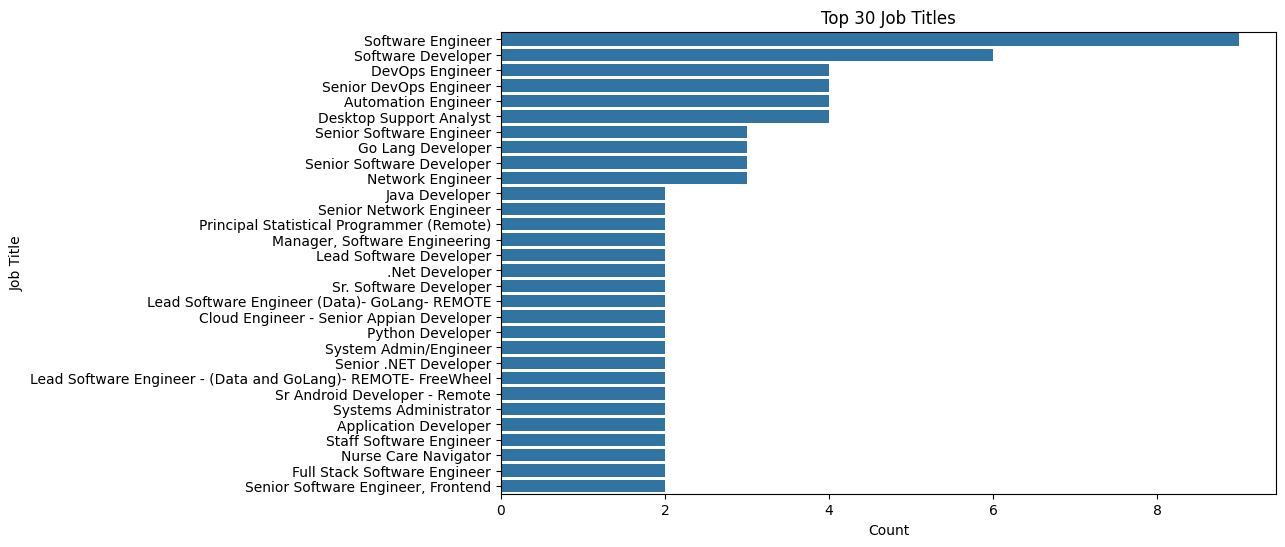

In [18]:
# Visualize top 'n' job titles
top_n = 30
top_job_titles = df['title'].value_counts().nlargest(top_n).index

plt.figure(figsize=(10, 6))
sns.countplot(y='title', data=df[df['title'].isin(top_job_titles)], order=top_job_titles)
plt.title(f'Top {top_n} Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

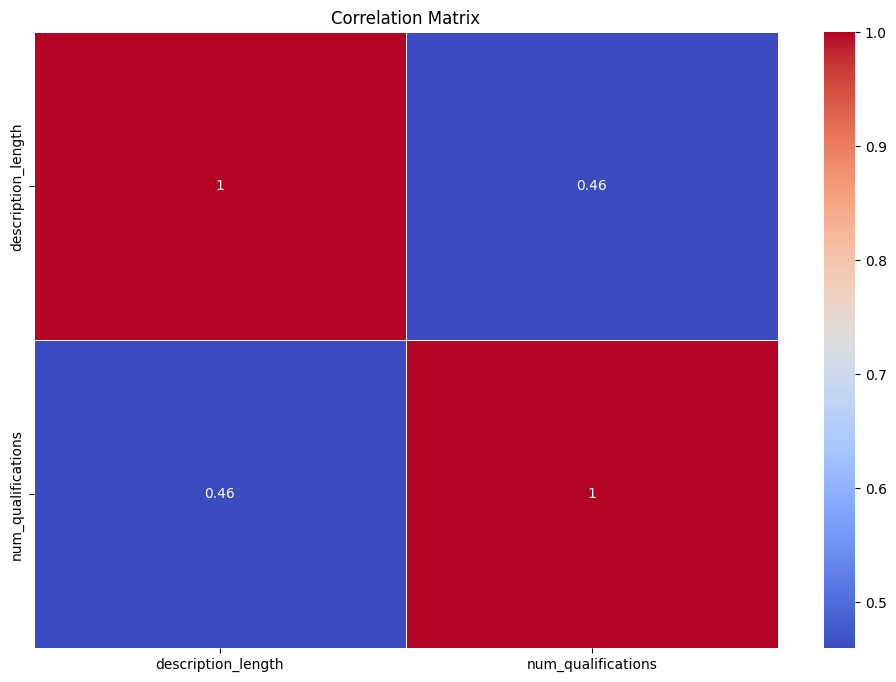

In [16]:
# Compute and visualize the correlation matrix
numerical_cols = ['description_length', 'num_qualifications']

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

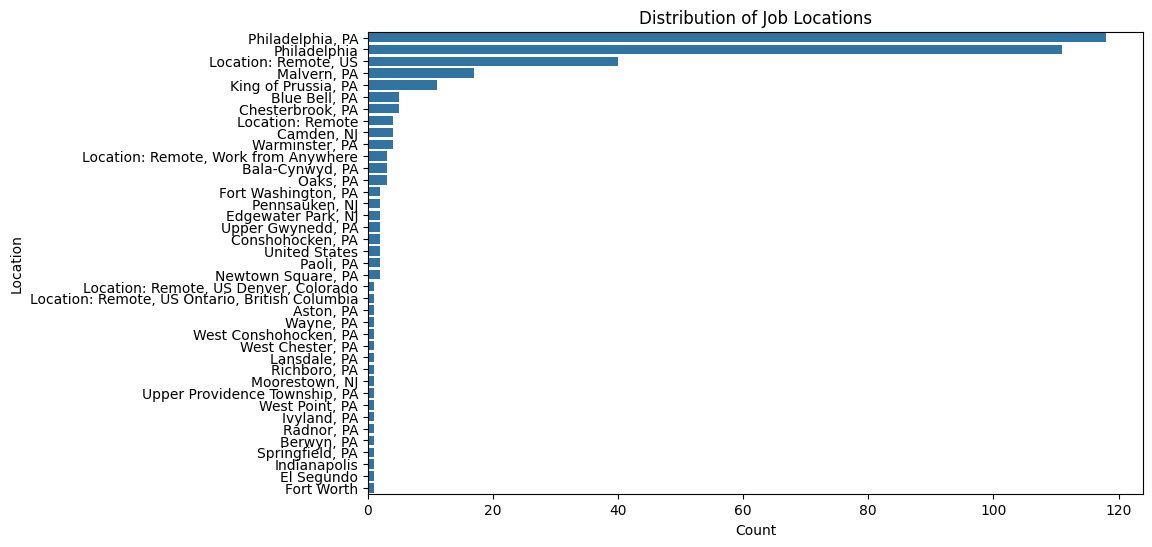

In [19]:
# Visualize distribution of job locations
plt.figure(figsize=(10, 6))
sns.countplot(y='location', data=df, order=df['location'].value_counts().index)
plt.title('Distribution of Job Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

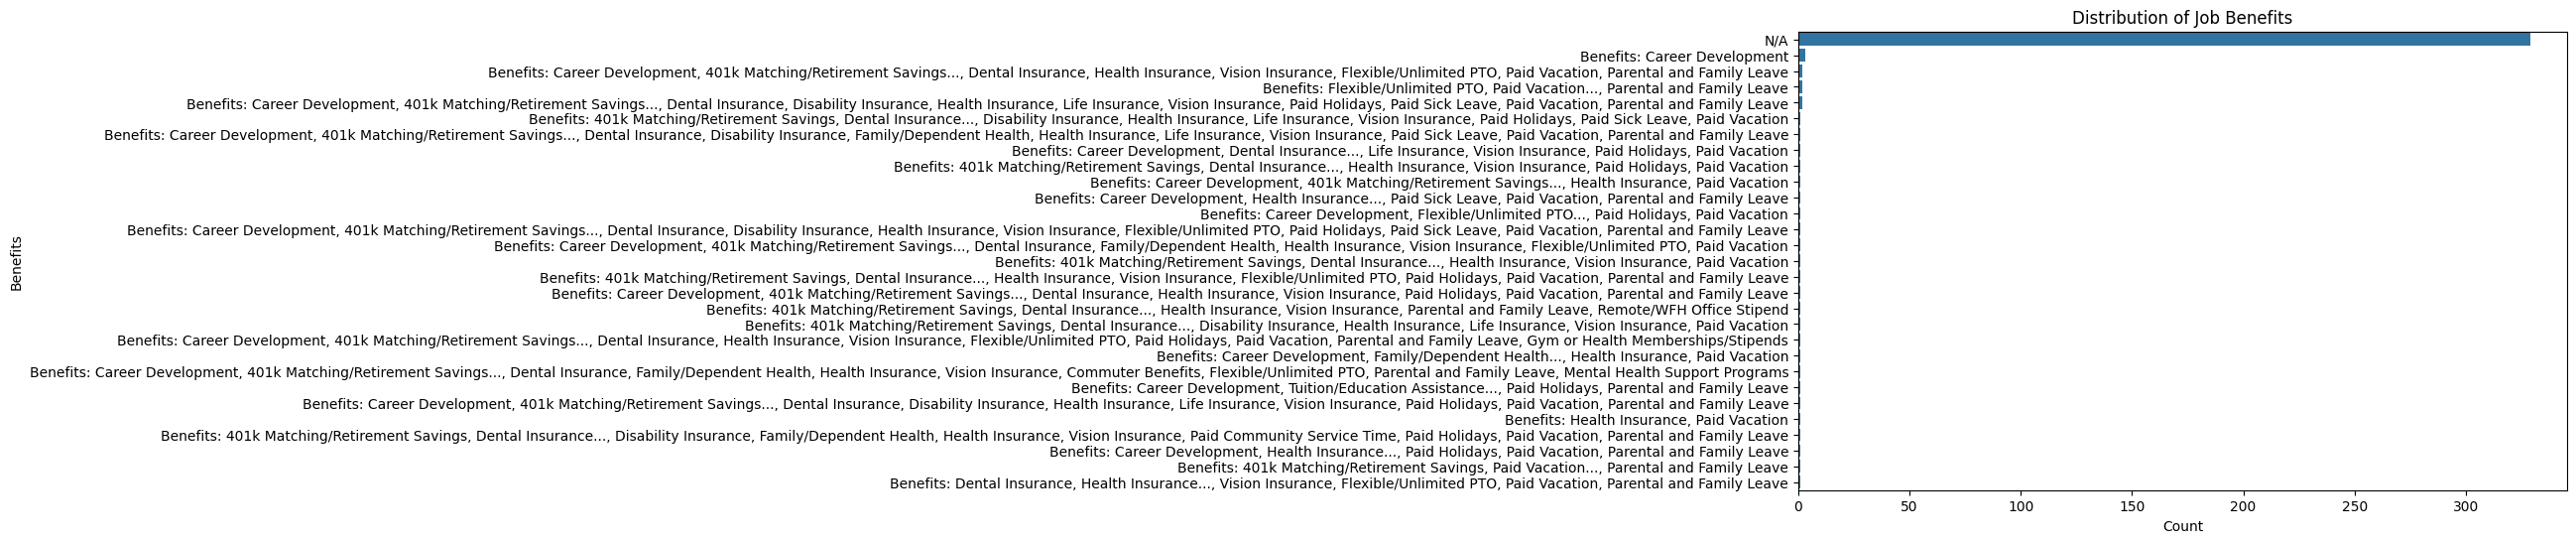

In [20]:
# Visualize distribution of job benefits
plt.figure(figsize=(10, 6))
sns.countplot(y='benefits', data=df, order=df['benefits'].value_counts().index)
plt.title('Distribution of Job Benefits')
plt.xlabel('Count')
plt.ylabel('Benefits')
plt.show()

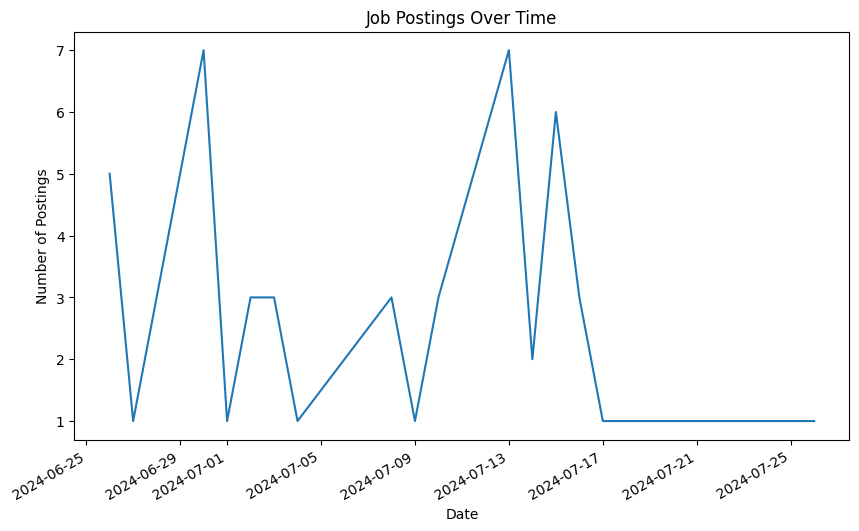

In [23]:
# Convert posted_date to datetime
df['posted date'] = pd.to_datetime(df['posted date'], errors='coerce')

# Visualize job postings over time
plt.figure(figsize=(10, 6))
df['posted date'].value_counts().sort_index().plot(kind='line')
plt.title('Job Postings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Postings')
plt.show()

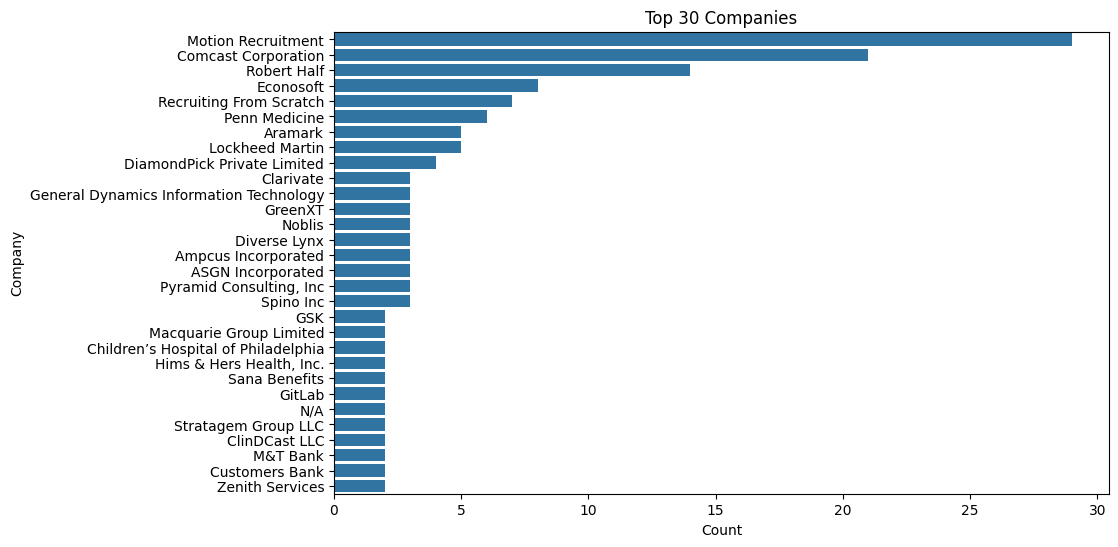

In [25]:
# Visualize the distribution of companies
top_n = 30
top_job_companies = df['company'].value_counts().nlargest(top_n).index

plt.figure(figsize=(10, 6))
sns.countplot(y='company', data=df[df['company'].isin(top_job_companies)], order=top_job_companies)
plt.title(f'Top {top_n} Companies')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()

## Insights and Findings

1. Distribution of Job Titles:
   - The most common job title in the dataset is "Software Engineer," followed by "Software Developer" and "DevOps Engineer."
   - The top 30 job titles include roles such as "Automation Engineer," "Desktop Support Analyst," and "Senior Software Engineer," indicating a high demand for technical and engineering positions.

2. Data Quality:
   - The dataset initially had missing values in several columns, particularly in `company`, `job type`, `benefits`, `posted date`, `qualifications`, and `job description`. These have been filled with 'N/A' for consistency.
   - There are no duplicate rows in the dataset, ensuring data integrity.

3. Numerical Features:
   - Two numerical features were created for deeper analysis:
     - `description_length`: Represents the length of the job description.
     - `num_qualifications`: Represents the number of qualifications listed for each job.

4. Correlation Matrix:
   - The correlation matrix shows a moderate positive correlation (0.46) between `description_length` and `num_qualifications`, indicating that job descriptions with more qualifications tend to be longer.
   - There are no other strong correlations between the numerical features, suggesting they provide unique information.

5. Top Job Titles:
   - The top 30 job titles reflect a high demand for roles in software development and engineering. This includes titles such as "Senior DevOps Engineer," "Automation Engineer," and "Senior Software Engineer."

6. Geographical Distribution:
   - The majority of job postings are for remote positions, as indicated by the frequent occurrence of "Remote" in the location data.
   - Among specific locations, "Philadelphia, PA" has the highest number of postings, followed by other locations in Pennsylvania and New Jersey.

7. Job Benefits:
   - The benefits column shows a variety of entries. The most common benefit, aside from 'N/A', is "Career Development, 401k Matching/Retirement Savings, Dental Insurance," indicating the importance of these benefits in job postings.

8. Job Posting Dates:
   - The job postings span a range of recent dates, indicating the dataset includes up-to-date listings. There are fluctuations in posting frequency over time, with some dates having significantly more postings than others.

9. Distribution of Companies:
   - The top companies posting jobs include "Motion Recruitment," "Comcast Corporation," and "Robert Half," indicating that these companies are actively hiring for various roles.